In [201]:
import cellrank as cr
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import sparse
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
import time as tm
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping
import joblib

In [295]:
cr.settings.figdir="../result/11.5_multi_traj/"

In [5]:
adata=sc.read_h5ad("../../temp_data/10.27_dpt_sub.h5ad")

In [59]:
dpt=pd.read_csv("../../temp_data/palantir_norm.csv",index_col=0)

In [60]:
dpt

palantir_norm_scale_2
Unnamed: 0                                                         
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0               0.181792
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0               0.570987
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0               0.602759
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0               0.312320
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0               0.227514
...                                                             ...
TTTGACTGTATTTCCT-1_5-1-2                                   0.234703
TTTGACTGTTGCATTG-1_5-1-2                                   0.296926
TTTGACTTCTTGGGCG-1_5-1-2                                   0.441128
TTTGGAGCAGCGACAA-1_5-1-2                                   0.667427
TTTGGTTCACTACTTT-1_5-1-2                                   0.606335

[166204 rows x 1 columns]

In [7]:
model = cr.models.GAMR(adata, n_knots=6, smoothing_penalty=10.0)

In [13]:
adata=adata[adata.obs["Project"]=="Mandible2020_Chai"]

In [15]:
model = cr.models.GAMR(adata, n_knots=6, smoothing_penalty=10.0)

In [21]:
adata.layers["log_count"]=adata.X

In [22]:
adata

AnnData object with n_obs × n_vars = 5704 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leid

In [63]:
adata.obs["palantir_norm_scale"]=dpt.loc[adata.obs_names]

  0%|          | 0/2 [00:00<?, ?gene/s]

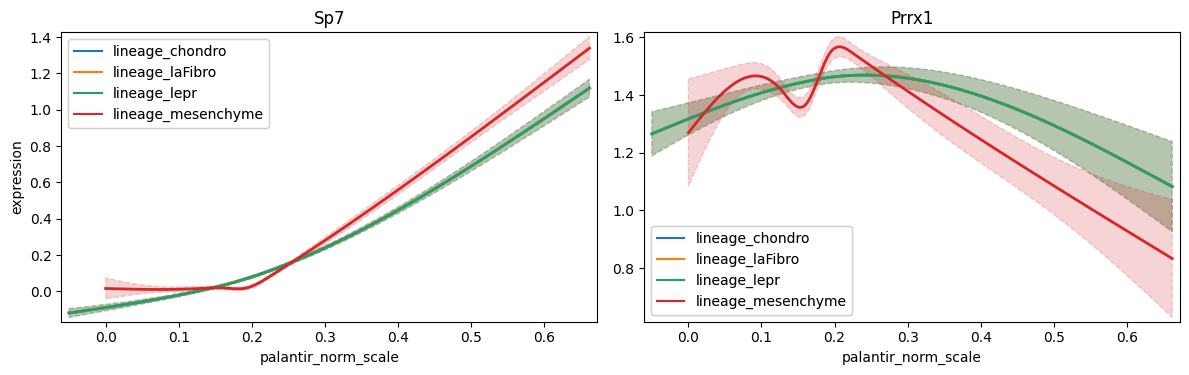

In [64]:
cr.pl.gene_trends(
    adata,
    model=model,
    data_key="log_count",
    genes=["Sp7","Prrx1"],
    same_plot=True,
    ncols=2,
    time_key="palantir_norm_scale",
    hide_cells=True,
    weight_threshold=(1e-3, 1e-3),
)

In [28]:
lineageMeta=pd.read_csv("../../important_processed_data/11.2_dpt_lineage_infer.csv",index_col=0)

In [33]:
np.array(lineageMeta).astype("int")

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0]])

In [37]:
lineageMeta=lineageMeta.loc[adata.obs_names]

In [46]:
sum(adata.obsm['lineages_fwd'])

Lineage([[   0,    0,    0, 5704]],
  names([lineage_chondro, lineage_laFibro, lineage_lepr, lineage_mesenchyme]))

In [39]:
adata.obsm['lineages_fwd']=cr.Lineage(np.array(lineageMeta).astype("int"),names=lineageMeta.columns)

  0%|          | 0/4 [00:00<?, ?gene/s]

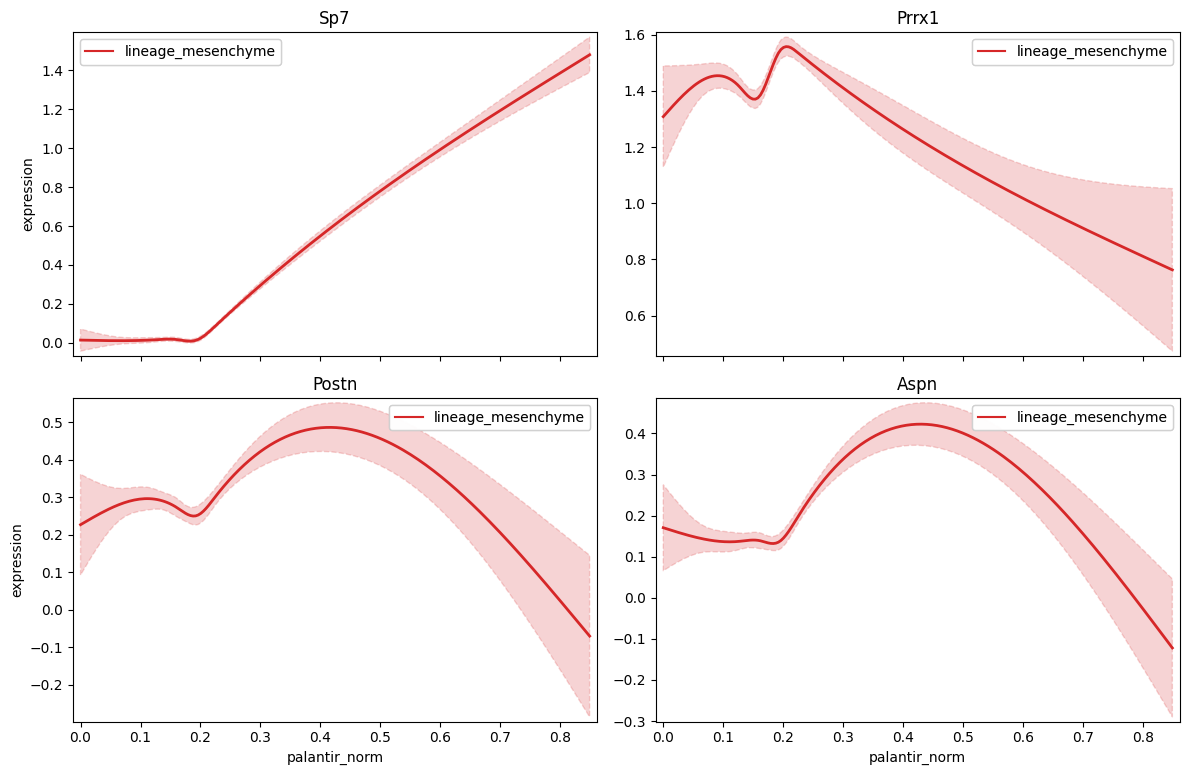

In [65]:
test=cr.pl.gene_trends(
    adata,
    model=model,
    data_key="log_count",
    genes=["Sp7","Prrx1","Postn","Aspn"],
    same_plot=True,
    ncols=2,
    time_key="palantir_norm",
    hide_cells=True,
    lineages="lineage_mesenchyme",return_models=True,
    weight_threshold=(1e-3, 1e-3),
)

  0%|          | 0/1 [00:00<?, ?gene/s]

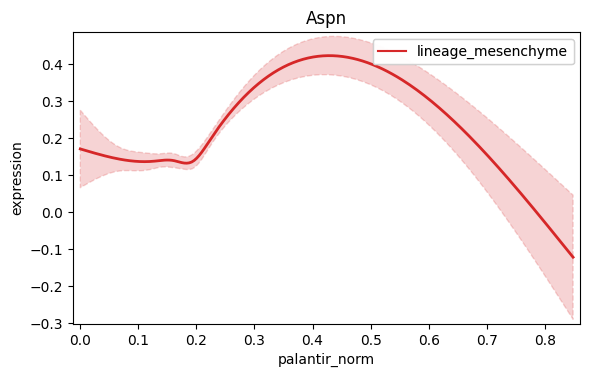

In [301]:
cr.pl.gene_trends(
    small_adata,
    model=model,
    data_key="log_count",
    genes=["Aspn"],
    same_plot=True,
    ncols=2,
    time_key="palantir_norm",
    hide_cells=True,
    lineages="lineage_mesenchyme",
    weight_threshold=(1e-3, 1e-3),save="Aspn_traj.pdf",return_figure=False
)

  0%|          | 0/1 [00:00<?, ?gene/s]

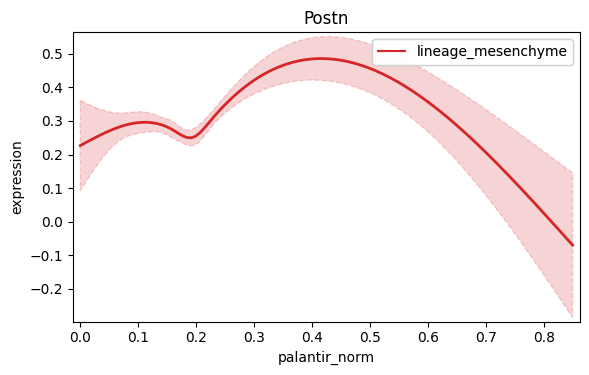

In [293]:
test_gam=cr.pl.gene_trends(
    small_adata,
    model=model,
    data_key="log_count",
    genes=["Postn"],
    same_plot=True,
    ncols=2,
    time_key="palantir_norm",
    hide_cells=True,
    lineages="lineage_mesenchyme",
    weight_threshold=(1e-3, 1e-3),return_models=True
)


In [259]:
test

0
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
...        ...
5699  0.000000
5700  0.865725
5701  1.252691
5702  0.000000
5703  0.000000

[5704 rows x 1 columns]

In [251]:
small_adata.var_names

Index(['0610007N19Rik', '0610007P14Rik', '0610009B22Rik', '0610009D07Rik',
       '0610009E02Rik', '0610009L18Rik', '0610009O20Rik', '0610010F05Rik',
       '0610010K14Rik', '0610011F06Rik',
       ...
       'mt-Tq', 'mt-Ts2', 'mt-Tt', 'mt-Tv', 'mt-Tw', 'mt-Ty', 'tdT-WPRE-trans',
       'tdTomato-WPRE-trans', 'tdtomato', 'tomato'],
      dtype='object', length=17312)

In [313]:
test_gam["Postn"]["lineage_mesenchyme"]

<GAMR[gene='Postn', lineage='lineage_mesenchyme', model=Family: gaussian Link function: identity Formula: y ~ s(x, bs = "cr", k = 6, sp = 10) Estimated degrees of freedom: 4.52 total = 5.52 GCV score: 0.2909191]>

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/cellrank/models/_base_model.py:796: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  _ = ax.scatter(


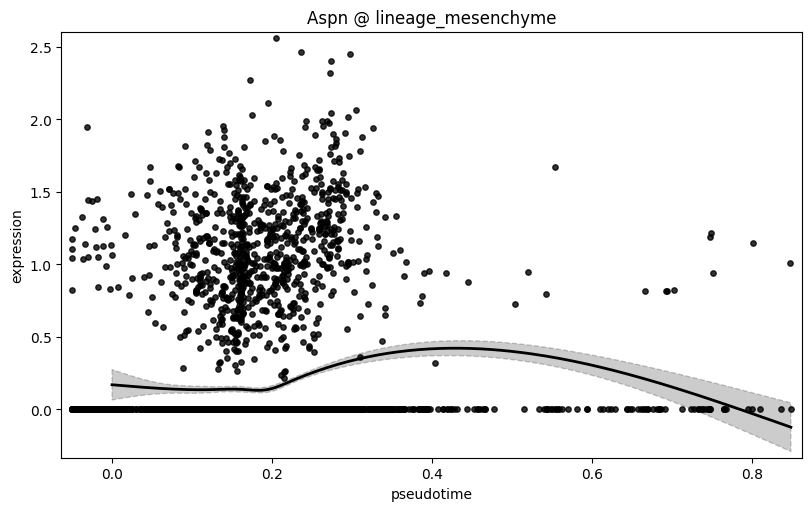

In [284]:
test_gam["Aspn"]["lineage_mesenchyme"].plot()

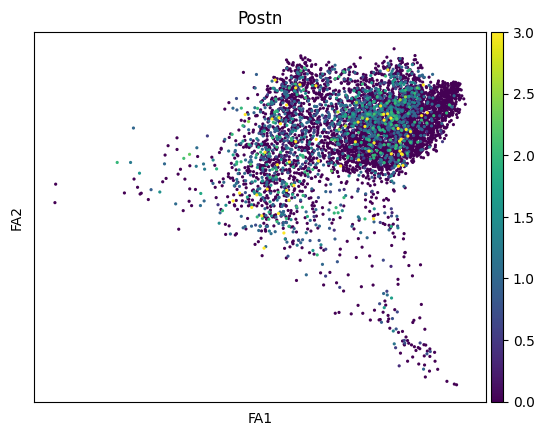

In [292]:
sc.pl.draw_graph(small_adata,color="Postn",vmax=3)

In [66]:
dpt=adata.obs["palantir_norm_scale"]
num_bins = 10
hist, bin_edges = np.histogram(dpt, bins=num_bins)
dpt_bin=np.digitize(dpt, bin_edges)
adata.obs["dpt_bin"]=dpt_bin

In [67]:
adata.obs["dpt_bin"]

Unnamed: 0
Mandible2020_Chai_AAACCTGCATAGACTC-0          2
Mandible2020_Chai_AAACGGGCAAGACACG-0          3
Mandible2020_Chai_AAACGGGTCAAACGGG-0          3
Mandible2020_Chai_AAAGATGAGTGTGAAT-0          3
Mandible2020_Chai_AAAGATGGTGTGGCTC-0          3
                                             ..
Mandible2020_Chai_E12_TTTGGTTAGAATAGGG_2-0    3
Mandible2020_Chai_E12_TTTGTCAAGTGTACTC_2-0    3
Mandible2020_Chai_E12_TTTGTCACACAACGTT_2-0    6
Mandible2020_Chai_E12_TTTGTCATCTGCGTAA_2-0    4
Mandible2020_Chai_E12_TTTGTCATCTTCCTTC_2-0    3
Name: dpt_bin, Length: 5704, dtype: int64

In [316]:
test = pd.DataFrame(small_adata.X.A)
test.index = small_adata.obs_names
test.columns = small_adata.var_names
test = test.join(small_adata.obs["dpt_bin"])
agg_dict = {gene: "mean" for gene in adata.var_names}


In [325]:
test_agg = test.groupby("dpt_bin").agg(agg_dict)

In [329]:
bin_mask=test.groupby("dpt_bin").size()<5

In [331]:
test_agg[bin_mask]=np.nan

In [337]:
test_agg["Sp7"].sum()

4.7328153

In [342]:
test_agg["Sp7"].var()

0.24366413056850433

In [376]:
max_rows = {}
min_rows={}
max_values={}
min_values={}
sum_values={}
range_values={}
variance_values={}

for column in test_agg.columns:
    if test_agg[column].sum() == 0:
        max_rows[column]=0
        max_values[column]=0
        min_rows[column] = 0
        min_values[column] = 0
        sum_values[column]=0
        range_values[column] = 0
        variance_values[column] = 0
    else:
        max_row = test_agg[column].idxmax()
        min_row = test_agg[column].idxmin()
        max_rows[column] = max_row
        min_rows[column] = min_row
        max_value=test_agg.loc[max_row,column]
        max_values[column]=max_value
        min_value=test_agg.loc[min_row,column]
        min_values[column]=min_value
        sum_values[column]=test_agg[column].sum()
        range_values[column]=max_value-min_value
        variance_values[column]=test_agg[column].var()
        

In [377]:
metricDf=pd.DataFrame({"max_rows":max_rows.values(),
                      "min_rows":min_rows.values(),
                      "max_values":max_values.values(),
                      "min_values":max_values.values(),
                      "sum_values":sum_values.values(),
                      "range_values":range_values.values(),
                      "variance_values":variance_values.values()})

In [379]:
metricDf.index=max_rows.keys()

In [386]:
test_dpt=small_adata.obs["palantir_norm_scale"]

In [408]:
mutualInfoDict={}
pearsonCoorDict={}
pearsonPvalDict={}
spearmanCoorDict={}
spearmanPvalDict={}
kendalltauDict={}
kendalltauPvalDict={}


for column in test.columns:
    print(f"working on {column}")
    mutual_info_coef=mutual_info_regression(test.loc[:,column].to_frame(), test_dpt, discrete_features=[False])
    mutualInfoDict[column]=mutual_info_coef[0]
    kendal,kendalP=kendalltau(test.loc[:,column].to_frame(), test_dpt)
    spearman,spearmanP=spearmanr(test.loc[:,column].to_frame(), test_dpt)
    pearson,pearsonP=pearsonr(test.loc[:,column], test_dpt)
    pearsonCoorDict[column]=pearson
    pearsonPvalDict[column]=pearsonP
    spearmanCoorDict[column]=spearman
    spearmanPvalDict[column]=spearmanP
    kendalltauDict[column]=kendal
    kendalltauPvalDict[column]=kendalP

working on 0610007N19Rik
working on 0610007P14Rik
working on 0610009B22Rik
working on 0610009D07Rik
working on 0610009E02Rik
working on 0610009L18Rik
working on 0610009O20Rik
working on 0610010F05Rik
working on 0610010K14Rik
working on 0610011F06Rik
working on 0610012G03Rik
working on 0610030E20Rik
working on 0610031J06Rik
working on 0610033M10Rik
working on 0610037L13Rik
working on 0610038B21Rik
working on 0610039K10Rik
working on 0610040B10Rik
working on 0610040J01Rik
working on 0610043K17Rik
working on 1010001B22Rik
working on 1110001A16Rik
working on 1110001J03Rik
working on 1110002E22Rik
working on 1110002L01Rik
working on 1110004E09Rik
working on 1110004F10Rik
working on 1110006O24Rik
working on 1110007C09Rik
working on 1110008F13Rik
working on 1110008J03Rik
working on 1110008L16Rik
working on 1110008P14Rik
working on 1110012L19Rik
working on 1110017D15Rik
working on 1110019D14Rik
working on 1110020A21Rik
working on 1110032A03Rik
working on 1110032F04Rik
working on 1110034G24Rik


In [417]:
metricDf_2=pd.DataFrame({"mutual_info":[inner[0] for inner in mutualInfoDict.values()],
                      "pearsonCoor":pearsonCoorDict.values(),
                      "pearsonP":pearsonPvalDict.values(),
                      "spearmanCoor":spearmanCoorDict.values(),
                      "spearmanP":spearmanPvalDict.values(),
                      "kendalltau":kendalltauDict.values(),
                      "kendalltauP":kendalltauPvalDict.values()})

In [418]:
metricDf_2.index=mutualInfoDict.keys()

In [532]:
metric_sum=pd.merge(metricDf,metricDf_2,left_index=True,right_index=True)

In [533]:
metric_sum=metric_sum.fillna(0)

In [429]:
metric_sum.to_csv("../result/11.5_multi_traj/11.6_gene_trend_metric.csv")

In [434]:
delll_adata.obsm["lineages_fwd"]

In [435]:
small_adata.write_h5ad("../../temp_data/11.6_smalladata.h5ad")

In [437]:
lienageCr=cr.Lineage(np.array(lineageMeta).astype("int"),names=lineageMeta.columns)

In [441]:
lineageLogic=np.isin(adata.obs_names,small_adata.obs_names)

In [442]:
sum(lineageLogic)

5704

In [443]:
lienageCr[lineageLogic]

Lineage([[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
  names([lineage_chondro, lineage_laFibro, lineage_lepr, lineage_mesenchyme]))

In [444]:
small_adata.obsm['lineages_fwd']=lienageCr[lineageLogic]

In [445]:
small_adata

AnnData object with n_obs × n_vars = 5704 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leid

  0%|          | 0/17312 [00:00<?, ?gene/s]

Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LI

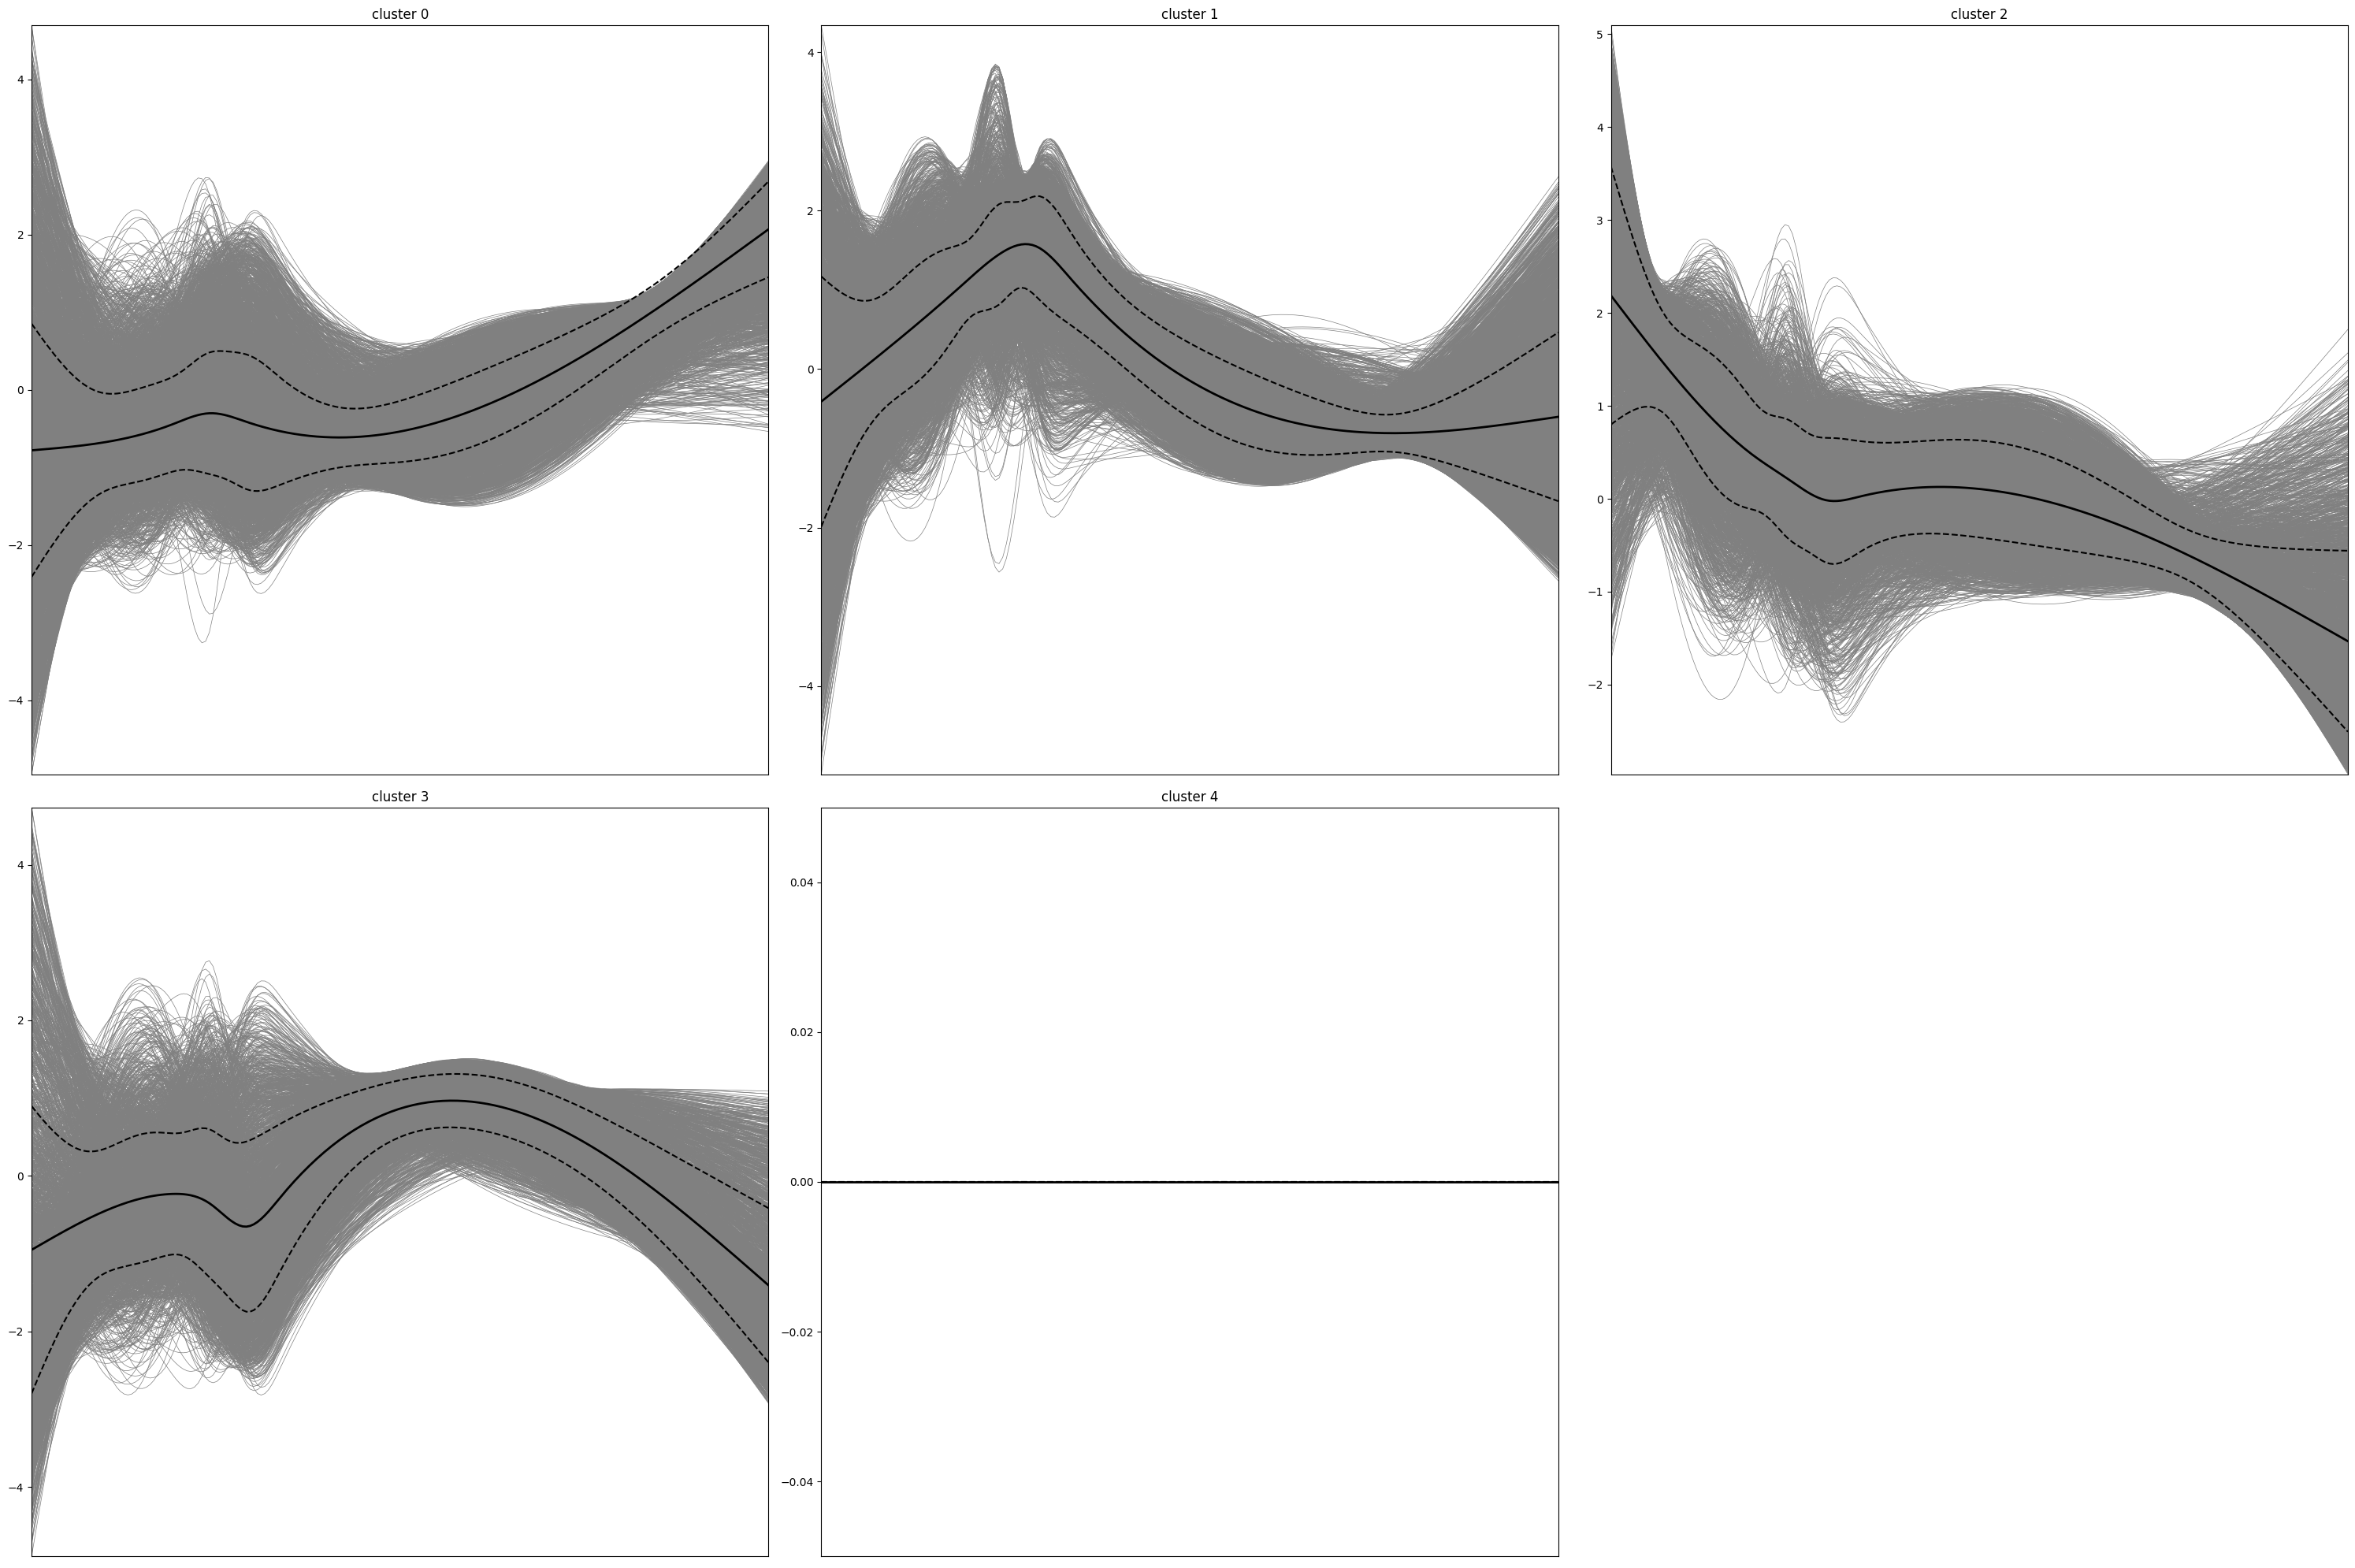

In [450]:
cr.pl.cluster_trends(
    small_adata,
    model=model,  # use the model from before
    lineage="lineage_mesenchyme",
    data_key="log_count",
    genes=small_adata.var_names,
    time_key="palantir_norm_scale",
    weight_threshold=(1e-3, 1e-3),
    n_jobs=20,
    random_state=0,
    clustering_kwargs={"resolution": 0.2, "random_state": 0},
    neighbors_kwargs={"random_state": 0},
)

In [452]:
small_adata

AnnData object with n_obs × n_vars = 5704 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leid

In [454]:
gdata = small_adata.uns["lineage_lineage_mesenchyme_trend"].copy()

In [469]:
df=gdata.X

In [464]:
df.shape

(17312, 200)

In [470]:
df=pd.DataFrame(df)
df.index=small_adata.var_names

In [467]:
df=df.T

In [471]:
df

0         1         2         3         4    \
0610007N19Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
0610007P14Rik        1.624669  1.512008  1.399502  1.287308  1.175582   
0610009B22Rik        1.738364  1.670571  1.602949  1.535672  1.468916   
0610009D07Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
0610009E02Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
mt-Ty                0.000000  0.000000  0.000000  0.000000  0.000000   
tdT-WPRE-trans       0.000000  0.000000  0.000000  0.000000  0.000000   
tdTomato-WPRE-trans  0.000000  0.000000  0.000000  0.000000  0.000000   
tdtomato             0.000000  0.000000  0.000000  0.000000  0.000000   
tomato               0.000000  0.000000  0.000000  0.000000  0.000000   

                          5         6         7         8         9    ...  \
0610007N19Rik        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
0610007P14Rik        1.064482  0.954165  0.844786  0.736504  0.629474  ...   
0610009B22Rik        1.402852  1.337655  1.273500  1.210559  1.149007  ...   
0610009D07Rik        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
0610009E02Rik        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...                       ...       ...       ...       ...       ...  ...   
mt-Ty                0.000000  0.000000  0.000000  0.000000  0.000000  ...   
tdT-WPRE-trans       0.000000  0.000000  0.000000  0.000000  0.000000  ...   
tdTomato-WPRE-trans  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
tdtomato             0.000000  0.000000  0.000000  0.000000  0.000000  ...   
tomato               0.000000  0.000000  0.000000  0.000000  0.000000  ...   

                          190       191       192       193       194  \
0610007N19Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
0610007P14Rik        1.832443  1.864084  1.895747  1.927428  1.959125   
0610009B22Rik       -1.005428 -1.000158 -0.994825 -0.989437 -0.984001   
0610009D07Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
0610009E02Rik        0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
mt-Ty                0.000000  0.000000  0.000000  0.000000  0.000000   
tdT-WPRE-trans       0.000000  0.000000  0.000000  0.000000  0.000000   
tdTomato-WPRE-trans  0.000000  0.000000  0.000000  0.000000  0.000000   
tdtomato             0.000000  0.000000  0.000000  0.000000  0.000000   
tomato               0.000000  0.000000  0.000000  0.000000  0.000000   

                          195       196       197       198       199  
0610007N19Rik        0.000000  0.000000  0.000000  0.000000  0.000000  
0610007P14Rik        1.990835  2.022556  2.054284  2.086018  2.117754  
0610009B22Rik       -0.978526 -0.973020 -0.967489 -0.961943 -0.956389  
0610009D07Rik        0.000000  0.000000  0.000000  0.000000  0.000000  
0610009E02Rik        0.000000  0.000000  0.000000  0.000000  0.000000  
...                       ...       ...       ...       ...       ...  
mt-Ty                0.000000  0.000000  0.000000  0.000000  0.000000  
tdT-WPRE-trans       0.000000  0.000000  0.000000  0.000000  0.000000  
tdTomato-WPRE-trans  0.000000  0.000000  0.000000  0.000000  0.000000  
tdtomato             0.000000  0.000000  0.000000  0.000000  0.000000  
tomato               0.000000  0.000000  0.000000  0.000000  0.000000  

[17312 rows x 200 columns]

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x1000 with 0 Axes>

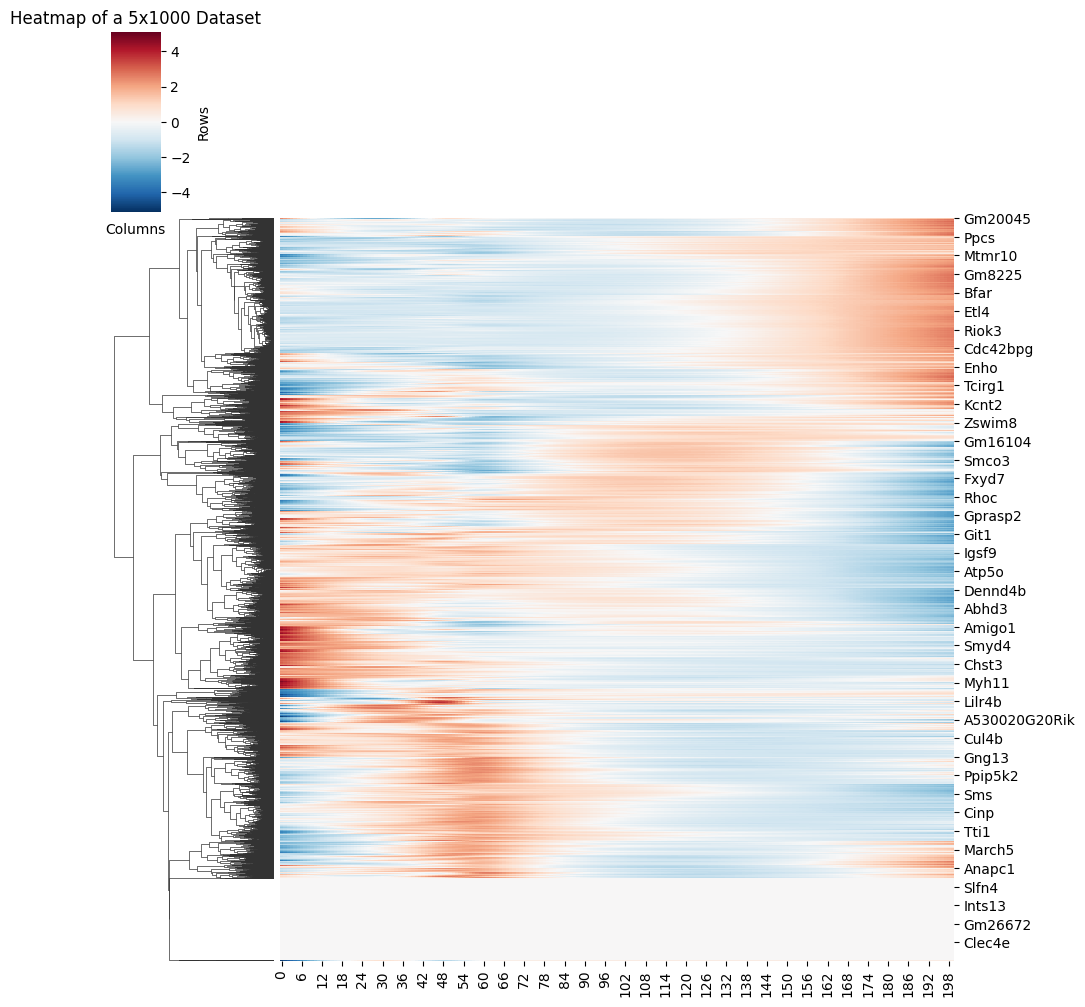

In [473]:
plt.figure(figsize=(10, 10))  # Set the figure size
clustermap=sns.clustermap(df, cmap="RdBu_r",col_cluster=False)  # You can choose a different colormap (cmap) if desired
row_order = clustermap.dendrogram_row.reordered_ind
plt.title("Heatmap of a 5x1000 Dataset")  # Set the plot title
plt.xlabel("Columns")
plt.ylabel("Rows")

plt.show() 

In [474]:
row_order

[6464,
 9784,
 10521,
 5385,
 16252,
 10940,
 12098,
 2213,
 3778,
 15144,
 3329,
 5744,
 8458,
 14543,
 8454,
 10233,
 9876,
 4100,
 9483,
 1377,
 1912,
 15498,
 1913,
 15522,
 9314,
 14970,
 1087,
 16836,
 10126,
 14133,
 15291,
 1077,
 12490,
 16980,
 242,
 6603,
 7549,
 13243,
 4501,
 6285,
 12250,
 14181,
 5860,
 9523,
 13469,
 12043,
 12083,
 1173,
 16518,
 10194,
 15316,
 14137,
 8676,
 10809,
 3700,
 5704,
 11659,
 7726,
 16762,
 9542,
 12173,
 14714,
 8808,
 15512,
 16426,
 15591,
 17023,
 5441,
 8789,
 4824,
 10848,
 4577,
 14893,
 8842,
 10651,
 16953,
 2912,
 15292,
 1079,
 8315,
 8999,
 9183,
 1427,
 1914,
 4356,
 7286,
 8377,
 15280,
 5246,
 7351,
 12628,
 1572,
 1287,
 1649,
 1000,
 652,
 10414,
 3881,
 4964,
 581,
 4742,
 15682,
 17076,
 7835,
 11425,
 9732,
 12376,
 4544,
 1128,
 17014,
 4852,
 11344,
 10349,
 2018,
 3527,
 9018,
 1792,
 11236,
 3885,
 12156,
 5084,
 832,
 1352,
 13370,
 8913,
 9071,
 3312,
 11312,
 1351,
 3023,
 13669,
 16886,
 10510,
 8154,
 13266,
 

In [477]:
metric_sum.iloc[row_order,]

max_rows  min_rows  max_values  min_values  sum_values  range_values  \
Gm20045        10         8    0.096115    0.096115    0.504139      0.096115   
Mkrn2           8         5    0.296656    0.296656    1.582215      0.172593   
Nid2            8         1    0.267495    0.267495    0.979206      0.235163   
Fdxacb1         9         7    0.066249    0.066249    0.264745      0.066249   
Usp34           9         7    0.678445    0.678445    4.954671      0.280093   
...           ...       ...         ...         ...         ...           ...   
Was             7         1    0.017701    0.017701    0.022816      0.017701   
Lhpp            1         8    0.059117    0.059117    0.330585      0.059117   
Ptges          10         8    0.093069    0.093069    0.616477      0.093069   
Arih2          10         9    0.184499    0.184499    1.245053      0.146941   
Fmnl1           7         1    0.017701    0.017701    0.020805      0.017701   

         variance_values  mutual_info  pearsonCoor  pearsonP  spearmanCoor  \
Gm20045         0.000741     0.000400     0.016704  0.207167      0.008740   
Mkrn2           0.002726     0.001038     0.007100  0.591898      0.013548   
Nid2            0.004129     0.010412     0.024845  0.060612      0.016210   
Fdxacb1         0.000338     0.001453     0.004370  0.741399      0.009678   
Usp34           0.006636     0.023851     0.026033  0.049290      0.029009   
...                  ...          ...          ...       ...           ...   
Was             0.000030     0.000000     0.003004  0.820567      0.000435   
Lhpp            0.000430     0.001522    -0.009179  0.488223      0.003499   
Ptges           0.000803     0.004047     0.015557  0.240107      0.028972   
Arih2           0.001890     0.014666     0.000034  0.997946      0.009909   
Fmnl1           0.000031     0.000323     0.007309  0.580993      0.004705   

         spearmanP  kendalltau  kendalltauP  
Gm20045   0.509299    0.007079     0.504995  
Mkrn2     0.306285    0.010807     0.297670  
Nid2      0.220931    0.012964     0.219690  
Fdxacb1   0.464924    0.007866     0.462725  
Usp34     0.028458    0.021512     0.024882  
...            ...         ...          ...  
Was       0.973768    0.000351     0.974122  
Lhpp      0.791616    0.002880     0.787863  
Ptges     0.028662    0.023376     0.027590  
Arih2     0.454320    0.007939     0.444309  
Fmnl1     0.722373    0.003840     0.722378  

[17312 rows x 14 columns]

In [479]:
def standardize_column(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

In [534]:
metric_sum["kendalltauP"][metric_sum["max_rows"]==0]=1
metric_sum["pearsonP"][metric_sum["max_rows"]==0]=1
metric_sum["spearmanP"][metric_sum["max_rows"]==0]=1

In [535]:
metric_sum["pearsonP"]=metric_sum["pearsonP"].fillna(1)

In [536]:
metric_sum["kendalltauP"]=-np.log(metric_sum["kendalltauP"])
metric_sum["pearsonP"]=-np.log(metric_sum["pearsonP"])
metric_sum["spearmanP"]=-np.log(metric_sum["spearmanP"])

In [538]:
metric_sum_bk=metric_sum.copy()

In [539]:
def standardize_column2(column):
    min_val = column.min()
    max_val = column.max()
    return (column-min_val)/(max_val-min_val)

In [540]:
metric_sum = metric_sum.apply(standardize_column2)

In [ ]:
min_value = df['values'].min()
max_value = df['values'].max()
df['scaled_values'] = (df['values'] - min_value) / (max_value - min_value)


In [527]:
metric_sum = metric_sum.apply(standardize_column)


In [555]:
metric_sum = metric_sum_bk.apply(lambda column: standardize_column2(column))

In [547]:
metric_sum = metric_sum.apply(standardize_column)

In [550]:
metric_sum_bk

max_rows  min_rows  max_values  min_values  sum_values  \
0610007N19Rik               0         0    0.000000    0.000000    0.000000   
0610007P14Rik               9         1    0.853527    0.853527    5.129170   
0610009B22Rik               9        10    0.263495    0.263495    2.168952   
0610009D07Rik               0         0    0.000000    0.000000    0.000000   
0610009E02Rik               0         0    0.000000    0.000000    0.000000   
...                       ...       ...         ...         ...         ...   
mt-Ty                       0         0    0.000000    0.000000    0.000000   
tdT-WPRE-trans              0         0    0.000000    0.000000    0.000000   
tdTomato-WPRE-trans         0         0    0.000000    0.000000    0.000000   
tdtomato                    0         0    0.000000    0.000000    0.000000   
tomato                      0         0    0.000000    0.000000    0.000000   

                     range_values  variance_values  mutual_info  pearsonCoor  \
0610007N19Rik            0.000000         0.000000     0.000197     0.000000   
0610007P14Rik            0.416807         0.015144     0.010017     0.019009   
0610009B22Rik            0.117591         0.001690     0.023631    -0.005778   
0610009D07Rik            0.000000         0.000000     0.000398     0.000000   
0610009E02Rik            0.000000         0.000000     0.000000     0.000000   
...                           ...              ...          ...          ...   
mt-Ty                    0.000000         0.000000     0.000234     0.000000   
tdT-WPRE-trans           0.000000         0.000000     0.000088     0.000000   
tdTomato-WPRE-trans      0.000000         0.000000     0.000663     0.000000   
tdtomato                 0.000000         0.000000     0.000000     0.000000   
tomato                   0.000000         0.000000     0.000083     0.000000   

                     pearsonP  spearmanCoor  spearmanP  kendalltau  \
0610007N19Rik       -0.000000      0.000000  -0.000000    0.000000   
0610007P14Rik        1.889464      0.008857   0.685955    0.006470   
0610009B22Rik        0.411513      0.009659   0.764021    0.007553   
0610009D07Rik       -0.000000      0.000000  -0.000000    0.000000   
0610009E02Rik       -0.000000      0.000000  -0.000000    0.000000   
...                       ...           ...        ...         ...   
mt-Ty               -0.000000      0.000000  -0.000000    0.000000   
tdT-WPRE-trans      -0.000000      0.000000  -0.000000    0.000000   
tdTomato-WPRE-trans -0.000000      0.000000  -0.000000    0.000000   
tdtomato            -0.000000      0.000000  -0.000000    0.000000   
tomato              -0.000000      0.000000  -0.000000    0.000000   

                     kendalltauP  
0610007N19Rik          -0.000000  
0610007P14Rik           0.688565  
0610009B22Rik           0.785497  
0610009D07Rik          -0.000000  
0610009E02Rik          -0.000000  
...                          ...  
mt-Ty                  -0.000000  
tdT-WPRE-trans         -0.000000  
tdTomato-WPRE-trans    -0.000000  
tdtomato               -0.000000  
tomato                 -0.000000  

[17312 rows x 14 columns]

In [549]:
metric_sum["spearmanP"][metric_sum["max_rows"]==0]=1

max_rows  min_rows  max_values  min_values  sum_values  \
0610007N19Rik       -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
0610007P14Rik        1.012974 -1.318786    1.281513    1.281513    0.891100   
0610009B22Rik        1.012974  1.265868   -0.008321   -0.008321    0.099188   
0610009D07Rik       -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
0610009E02Rik       -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
...                       ...       ...         ...         ...         ...   
mt-Ty               -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
tdT-WPRE-trans      -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
tdTomato-WPRE-trans -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
tdtomato            -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   
tomato              -1.622084 -1.605970   -0.584332   -0.584332   -0.481047   

                     range_values  variance_values  mutual_info  pearsonCoor  \
0610007N19Rik           -0.772581        -0.258074    -0.653186     0.002505   
0610007P14Rik            1.199850         0.235512    -0.047503     0.459922   
0610009B22Rik           -0.216112        -0.203004     0.792132    -0.136522   
0610009D07Rik           -0.772581        -0.258074    -0.640735     0.002505   
0610009E02Rik           -0.772581        -0.258074    -0.665307     0.002505   
...                           ...              ...          ...          ...   
mt-Ty                   -0.772581        -0.258074    -0.650863     0.002505   
tdT-WPRE-trans          -0.772581        -0.258074    -0.659870     0.002505   
tdTomato-WPRE-trans     -0.772581        -0.258074    -0.624410     0.002505   
tdtomato                -0.772581        -0.258074    -0.665307     0.002505   
tomato                  -0.772581        -0.258074    -0.660201     0.002505   

                     pearsonP  spearmanCoor  spearmanP  kendalltau  \
0610007N19Rik             NaN     -0.024758  -0.306873   -0.026756   
0610007P14Rik             NaN      0.211398  -0.263485    0.200207   
0610009B22Rik             NaN      0.232767  -0.258547    0.238188   
0610009D07Rik             NaN     -0.024758  -0.306873   -0.026756   
0610009E02Rik             NaN     -0.024758  -0.306873   -0.026756   
...                       ...           ...        ...         ...   
mt-Ty                     NaN     -0.024758  -0.306873   -0.026756   
tdT-WPRE-trans            NaN     -0.024758  -0.306873   -0.026756   
tdTomato-WPRE-trans       NaN     -0.024758  -0.306873   -0.026756   
tdtomato                  NaN     -0.024758  -0.306873   -0.026756   
tomato                    NaN     -0.024758  -0.306873   -0.026756   

                     kendalltauP  
0610007N19Rik          -0.314560  
0610007P14Rik          -0.270297  
0610009B22Rik          -0.264066  
0610009D07Rik          -0.314560  
0610009E02Rik          -0.314560  
...                          ...  
mt-Ty                  -0.314560  
tdT-WPRE-trans         -0.314560  
tdTomato-WPRE-trans    -0.314560  
tdtomato               -0.314560  
tomato                 -0.314560  

[17312 rows x 14 columns]

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 6.000e+00, 1.100e+01, 1.100e+01, 9.000e+00, 1.700e+01,
        2.500e+01, 2.100e+01, 3.000e+01, 4.500e+01, 5.100e+01, 7.900e+01,
        9.300e+01, 1.100e+02, 1.110e+02, 1.370e+02, 1.540e+02, 1.790e+02,
        2.040e+02, 2.250e+02, 2.790e+02, 3.530e+02, 4.470e+02, 4.660e+02,
        5.570e+02, 5.910e+02, 5.840e+02, 6.160e+02, 5.960e+02, 4.790e+02,
        4.270e+02, 3.570e+02, 2.340e+02, 1.750e+02, 7.000e+01, 1.946e+03,
        1.100e+02, 2.150e+02, 2.730e+02, 3.900e+02, 4.760e+02, 5.520e+02,
        6.010e+02, 5.710e+02, 5.920e+02, 5.840e+02, 5.520e+02, 4.910e+02,
        3.780e+02, 3.390e+02, 2.700e+02, 2.300e+02, 1.590e+02, 1.600e+02,
        1.250e+02, 9.000e+01, 6.600e+01, 6.200e+01, 5.600e+01, 4.600e+01,
        4.200e+01, 2.300e+01, 1.700e+01, 1.800e+01, 1.100e+01, 8.000e+00,
        1.500e+01, 9.000e+00, 6.000e+0

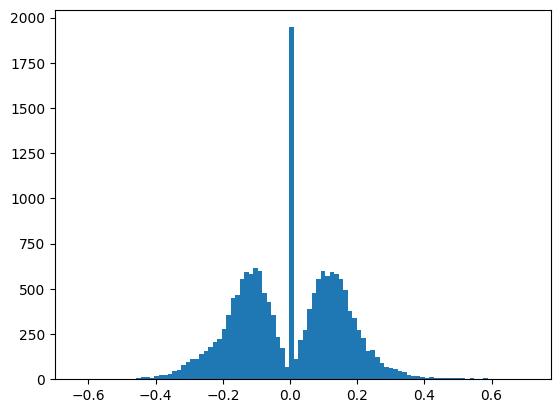

In [588]:
pearson=metric_sum_bk["pearsonCoor"]
pearson = np.where(pearson >= 0, np.sqrt(pearson), -np.sqrt(-pearson))
metric_sum['pearsonCoor']=pearson
plt.hist(pearson,bins=100)

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 1.000e+01, 1.100e+01,
        1.200e+01, 1.800e+01, 1.700e+01, 1.900e+01, 3.100e+01, 3.100e+01,
        3.600e+01, 5.300e+01, 6.500e+01, 8.800e+01, 8.300e+01, 1.050e+02,
        1.200e+02, 1.600e+02, 1.690e+02, 1.920e+02, 2.330e+02, 2.810e+02,
        3.740e+02, 4.080e+02, 4.830e+02, 4.730e+02, 5.350e+02, 5.430e+02,
        5.240e+02, 4.840e+02, 4.270e+02, 3.960e+02, 3.080e+02, 2.640e+02,
        1.640e+02, 1.020e+02, 1.955e+03, 3.900e+01, 1.110e+02, 1.650e+02,
        2.760e+02, 3.440e+02, 4.220e+02, 4.730e+02, 5.420e+02, 5.550e+02,
        6.100e+02, 6.050e+02, 6.040e+02, 5.530e+02, 4.440e+02, 4.030e+02,
        3.250e+02, 3.100e+02, 2.650e+02, 2.230e+02, 1.720e+02, 1.310e+02,
        9.800e+01, 8.800e+01, 7.600e+01, 5.500e+01, 3.100e+01, 4.100e+01,
        3.100e+01, 1.400e+01, 2.400e+0

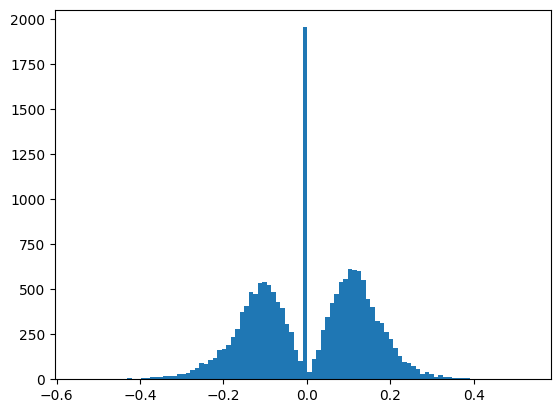

In [592]:
kendalltau=metric_sum_bk["kendalltau"]
kendalltau = np.where(kendalltau >= 0, np.sqrt(kendalltau), -np.sqrt(-kendalltau))
metric_sum['kendalltau']=kendalltau

plt.hist(kendalltau,bins=100)

In [598]:
max(pearsonP)

inf

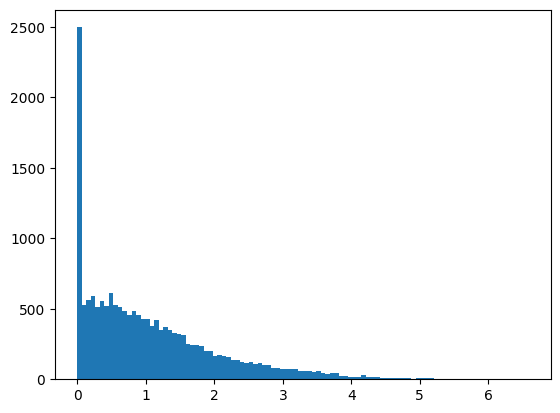

In [601]:
pearsonP=metric_sum_bk["pearsonP"]
pearsonP=pearsonP.replace(np.inf,0)
pearsonP=np.log(pearsonP+1)
plt.hist(pearsonP,bins=100)
metric_sum["pearsonP"]=pearsonP

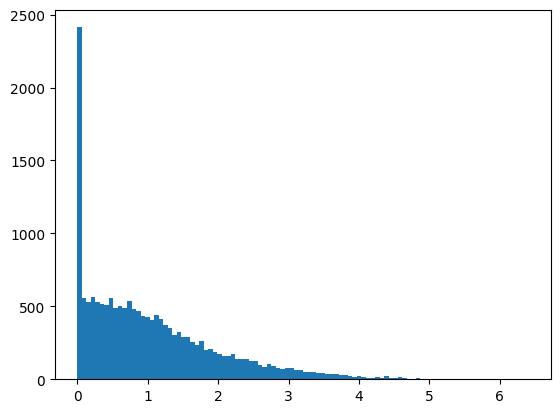

In [602]:
spearmanP=metric_sum_bk["spearmanP"]

spearmanP=np.log(spearmanP+1)
plt.hist(spearmanP,bins=100)
metric_sum["spearmanP"]=spearmanP

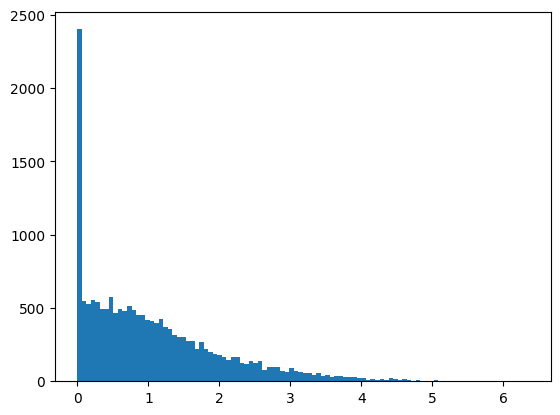

In [603]:
kendalltauP=metric_sum_bk["kendalltauP"]

kendalltauP=np.log(kendalltauP+1)
plt.hist(kendalltauP,bins=100)
metric_sum["kendalltauP"]=kendalltauP

(array([2.85e+03, 2.69e+02, 4.48e+02, 5.47e+02, 4.96e+02, 4.56e+02,
        3.94e+02, 3.24e+02, 3.02e+02, 3.25e+02, 3.20e+02, 3.17e+02,
        3.30e+02, 3.15e+02, 3.22e+02, 3.25e+02, 3.80e+02, 3.41e+02,
        3.51e+02, 3.44e+02, 3.74e+02, 3.49e+02, 3.62e+02, 3.74e+02,
        3.56e+02, 3.52e+02, 3.71e+02, 3.54e+02, 3.41e+02, 3.41e+02,
        3.15e+02, 3.12e+02, 2.96e+02, 3.17e+02, 2.74e+02, 2.64e+02,
        2.40e+02, 2.28e+02, 2.04e+02, 1.75e+02, 1.61e+02, 1.50e+02,
        1.20e+02, 1.08e+02, 9.10e+01, 7.60e+01, 6.60e+01, 5.90e+01,
        5.00e+01, 3.20e+01, 2.80e+01, 2.60e+01, 3.10e+01, 2.30e+01,
        3.30e+01, 2.40e+01, 1.70e+01, 1.80e+01, 1.40e+01, 8.00e+00,
        1.20e+01, 9.00e+00, 1.00e+01, 1.30e+01, 8.00e+00, 1.40e+01,
        6.00e+00, 5.00e+00, 6.00e+00, 1.00e+01, 5.00e+00, 1.10e+01,
        4.00e+00, 1.00e+00, 8.00e+00, 7.00e+00, 3.00e+00, 2.00e+00,
        5.00e+00, 4.00e+00, 2.00e+00, 9.00e+00, 4.00e+00, 3.00e+00,
        4.00e+00, 1.20e+01, 7.00e+00, 8.00e+00, 

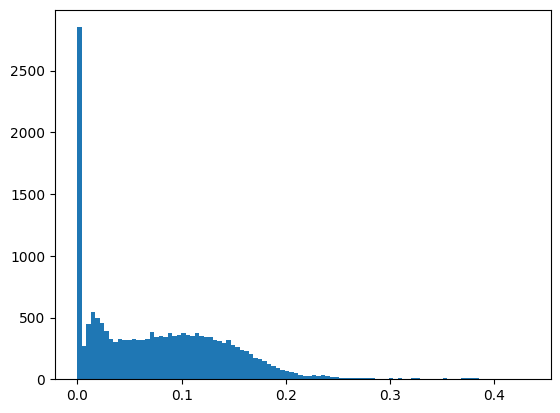

In [579]:
MI_val= np.sqrt(metric_sum_bk["mutual_info"])

plt.hist(MI_val,bins=100)

(array([1.938e+03, 1.940e+02, 2.390e+02, 2.560e+02, 3.350e+02, 3.360e+02,
        3.420e+02, 3.910e+02, 4.510e+02, 3.970e+02, 3.870e+02, 3.730e+02,
        3.220e+02, 4.870e+02, 4.440e+02, 5.370e+02, 5.130e+02, 5.450e+02,
        6.350e+02, 5.760e+02, 5.680e+02, 5.340e+02, 4.840e+02, 4.590e+02,
        4.710e+02, 4.580e+02, 4.070e+02, 3.970e+02, 3.600e+02, 3.010e+02,
        3.090e+02, 3.150e+02, 2.260e+02, 2.130e+02, 2.140e+02, 1.830e+02,
        1.810e+02, 1.490e+02, 1.320e+02, 1.290e+02, 1.180e+02, 8.500e+01,
        9.000e+01, 7.400e+01, 5.600e+01, 5.900e+01, 5.400e+01, 5.200e+01,
        4.100e+01, 3.800e+01, 3.700e+01, 3.300e+01, 2.500e+01, 1.800e+01,
        3.000e+01, 2.000e+01, 2.500e+01, 2.400e+01, 2.300e+01, 1.300e+01,
        1.900e+01, 1.100e+01, 1.200e+01, 9.000e+00, 1.600e+01, 5.000e+00,
        9.000e+00, 4.000e+00, 6.000e+00, 1.400e+01, 6.000e+00, 1.300e+01,
        9.000e+00, 1.300e+01, 7.000e+00, 9.000e+00, 5.000e+00, 5.000e+00,
        9.000e+00, 8.000e+00, 5.000e+0

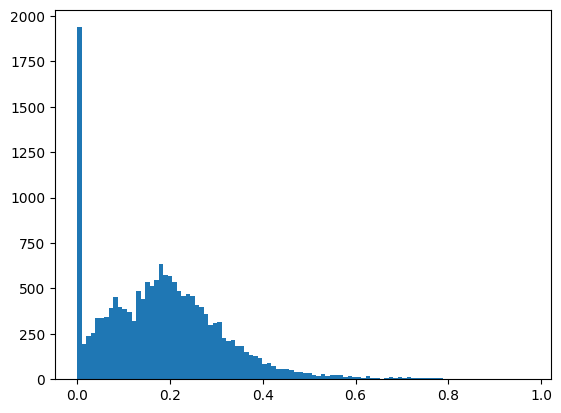

In [575]:
var_val= np.sqrt(metric_sum_bk["variance_values"])
var_val= np.sqrt(var_val)
plt.hist(var_val,bins=100)

In [604]:
metric_sum=metric_sum.apply(standardize_column2)

In [580]:
metric_sum["variance_values"]=var_val
metric_sum["mutual_info"]=MI_val

In [564]:
metric_sum["max_values"]=np.log(metric_sum_bk["max_values"]+1)
metric_sum["min_values"]=np.log(metric_sum_bk["min_values"]+1)
metric_sum["sum_values"]=np.log(metric_sum_bk["sum_values"]+1)
metric_sum["range_values"]=np.log(metric_sum_bk["range_values"]+1)



<AxesSubplot: >

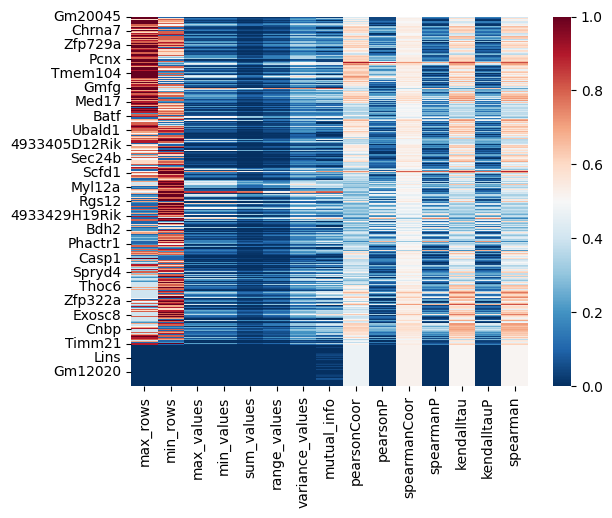

In [606]:
sns.heatmap(metric_sum.iloc[row_order,],vmax=1,vmin=0,cmap="RdBu_r")

In [607]:
metric_sum.to_csv("../result/11.5_multi_traj/11.6_gene_trend_metric_modify.csv")

<AxesSubplot: >

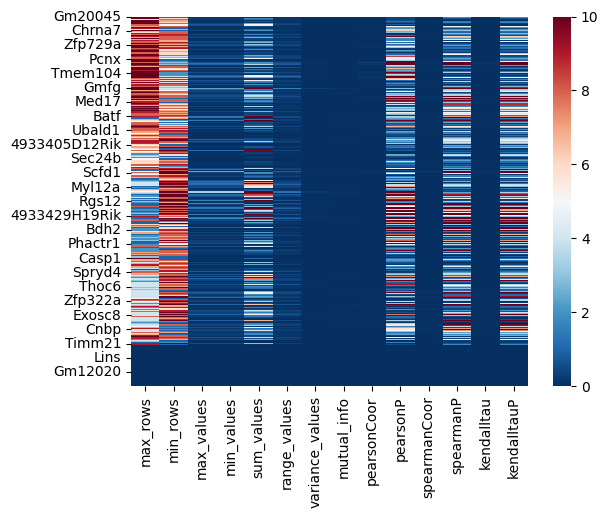

In [554]:
sns.heatmap(metric_sum_bk.iloc[row_order,],vmax=10,vmin=0,cmap="RdBu_r")

In [2]:
small_adata=sc.read_h5ad("../../temp_data/11.6_smalladata.h5ad")

In [3]:
test = pd.DataFrame(small_adata.X.A)
test.index = small_adata.obs_names
test.columns = small_adata.var_names

In [4]:

# Get column and index names
column_names = test.columns
index_names = test.index

# Create a list of element names
element_names = [f"{col}_sep_{row}" for row in index_names  for col in column_names ]


In [639]:
test.iloc[0:10,0:10]

0610007N19Rik  0610007P14Rik  \
Unnamed: 0                                                           
Mandible2020_Chai_AAACCTGCATAGACTC-0            0.0       1.239605   
Mandible2020_Chai_AAACGGGCAAGACACG-0            0.0       0.998610   
Mandible2020_Chai_AAACGGGTCAAACGGG-0            0.0       1.012387   
Mandible2020_Chai_AAAGATGAGTGTGAAT-0            0.0       1.244476   
Mandible2020_Chai_AAAGATGGTGTGGCTC-0            0.0       0.555586   
Mandible2020_Chai_AAAGATGGTGTGGTTT-0            0.0       1.424317   
Mandible2020_Chai_AAAGATGTCTCCGGTT-0            0.0       0.916694   
Mandible2020_Chai_AAAGATGTCTTGCCGT-0            0.0       0.835143   
Mandible2020_Chai_AAAGCAAAGGCGATAC-0            0.0       0.000000   
Mandible2020_Chai_AAAGCAACACGGTAAG-0            0.0       0.000000   

                                      0610009B22Rik  0610009D07Rik  \
Unnamed: 0                                                           
Mandible2020_Chai_AAACCTGCATAGACTC-0       0.000000            0.0   
Mandible2020_Chai_AAACGGGCAAGACACG-0       0.000000            0.0   
Mandible2020_Chai_AAACGGGTCAAACGGG-0       0.000000            0.0   
Mandible2020_Chai_AAAGATGAGTGTGAAT-0       0.000000            0.0   
Mandible2020_Chai_AAAGATGGTGTGGCTC-0       0.000000            0.0   
Mandible2020_Chai_AAAGATGGTGTGGTTT-0       1.141232            0.0   
Mandible2020_Chai_AAAGATGTCTCCGGTT-0       0.000000            0.0   
Mandible2020_Chai_AAAGATGTCTTGCCGT-0       0.000000            0.0   
Mandible2020_Chai_AAAGCAAAGGCGATAC-0       0.000000            0.0   
Mandible2020_Chai_AAAGCAACACGGTAAG-0       0.000000            0.0   

                                      0610009E02Rik  0610009L18Rik  \
Unnamed: 0                                                           
Mandible2020_Chai_AAACCTGCATAGACTC-0            0.0       0.000000   
Mandible2020_Chai_AAACGGGCAAGACACG-0            0.0       0.000000   
Mandible2020_Chai_AAACGGGTCAAACGGG-0            0.0       0.000000   
Mandible2020_Chai_AAAGATGAGTGTGAAT-0            0.0       0.000000   
Mandible2020_Chai_AAAGATGGTGTGGCTC-0            0.0       0.000000   
Mandible2020_Chai_AAAGATGGTGTGGTTT-0            0.0       0.000000   
Mandible2020_Chai_AAAGATGTCTCCGGTT-0            0.0       0.000000   
Mandible2020_Chai_AAAGATGTCTTGCCGT-0            0.0       0.835143   
Mandible2020_Chai_AAAGCAAAGGCGATAC-0            0.0       0.000000   
Mandible2020_Chai_AAAGCAACACGGTAAG-0            0.0       0.000000   

                                      0610009O20Rik  0610010F05Rik  \
Unnamed: 0                                                           
Mandible2020_Chai_AAACCTGCATAGACTC-0       0.000000       0.000000   
Mandible2020_Chai_AAACGGGCAAGACACG-0       0.000000       0.481449   
Mandible2020_Chai_AAACGGGTCAAACGGG-0       0.000000       0.000000   
Mandible2020_Chai_AAAGATGAGTGTGAAT-0       0.000000       0.000000   
Mandible2020_Chai_AAAGATGGTGTGGCTC-0       0.000000       0.000000   
Mandible2020_Chai_AAAGATGGTGTGGTTT-0       0.000000       0.000000   
Mandible2020_Chai_AAAGATGTCTCCGGTT-0       0.916694       0.000000   
Mandible2020_Chai_AAAGATGTCTTGCCGT-0       0.000000       0.000000   
Mandible2020_Chai_AAAGCAAAGGCGATAC-0       0.000000       0.000000   
Mandible2020_Chai_AAAGCAACACGGTAAG-0       0.000000       0.000000   

                                      0610010K14Rik  0610011F06Rik  
Unnamed: 0                                                          
Mandible2020_Chai_AAACCTGCATAGACTC-0       0.000000            0.0  
Mandible2020_Chai_AAACGGGCAAGACACG-0       0.726834            0.0  
Mandible2020_Chai_AAACGGGTCAAACGGG-0       0.000000            0.0  
Mandible2020_Chai_AAAGATGAGTGTGAAT-0       1.082526            0.0  
Mandible2020_Chai_AAAGATGGTGTGGCTC-0       0.555586            0.0  
Mandible2020_Chai_AAAGATGGTGTGGTTT-0       1.141232            0.0  
Mandible2020_Chai_AAAGATGTCTCCGGTT-0       0.000000            0.0  
Mandible2020_Chai_AAAGATGTCTTGCCGT-0       0.835143  

In [182]:
gene_vector = pd.DataFrame(small_adata.X.toarray()).values.flatten()

In [6]:
metric_sum=pd.read_csv("../result/11.5_multi_traj/11.6_gene_trend_metric_modify.csv",index_col=0)

In [173]:
repeated_dfs = []

# Repeat the DataFrame 100 times
num_repeats = small_adata.shape[0]
for _ in range(num_repeats):
    repeated_dfs.append(metric_sum)

# Concatenate the repeated DataFrames to create a single DataFrame
result_df = pd.concat(repeated_dfs, ignore_index=True)


In [174]:
dpt_array=small_adata.obs["palantir_norm_scale"].values

In [175]:
repeated_array = np.repeat(dpt_array, small_adata.shape[1])

In [176]:
result_df["dpt_time"]=repeated_array

In [183]:
len(gene_vector)

98747648

In [184]:
result_df=result_df[gene_vector!=0]

array([1.2396046 , 1.3987417 , 0.95202136, ..., 2.1063297 , 1.7599274 ,
       1.7599274 ], dtype=float32)

# fit raw expresison for feature selection

In [ ]:

rfr1 = RandomForestRegressor(n_jobs=20)
start=tm.time()
rfr1.fit(X_train, y_train)
tr_time=tm.time()-start
start=tm.time()
ypred = rfr3.predict(X_test)
ts_time=tm.time()-start

In [187]:
gene_vector=gene_vector[gene_vector!=0]


In [185]:
result_df=result_df[["max_rows","spearmanCoor","sum_values","dpt_time"]]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
     result_df, gene_vector, test_size=0.4, random_state=0)

In [164]:
len(gene_vector)

98747648

In [189]:
result_df.shape

(15064661, 4)

In [171]:
gene_vector=gene_vector[gene_vector!=0]

In [26]:
geneImport=pd.DataFrame({"metric":result_df.columns,"importance":rfr.feature_importances_})

In [27]:
geneImport=geneImport.sort_values("importance",ascending=False)

In [43]:
geneImport.to_csv("../result/11.5_multi_traj/11.6_gene_expression_rf.csv")

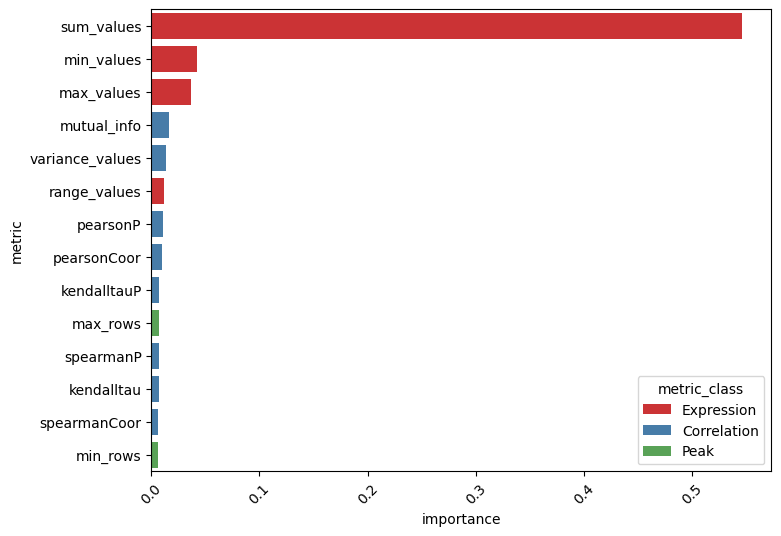

In [203]:
plt.figure(figsize=(8, 6))
# Define the color palette
color_palette = sns.color_palette("Set1", n_colors=len(geneImport_2['metric_class'].unique()))

# Create a bar plot with the color palette
sns.set_palette(color_palette)
sns.barplot(y ='metric', x='importance', hue='metric_class',dodge=False, data=geneImport)
plt.xticks(rotation=45)
plt.show()

array([0.8086407 , 0.96117675, 1.610934  , ..., 1.7713506 , 1.4757951 ,
       1.1262586 ], dtype=float32)

In [41]:
tradeSmooth=pd.read_csv("../result/11.5_multi_traj/11.5_tradeseq_scale.csv",index_col=0)

In [62]:
tradeSmooth

lineage1_1  lineage1_2  lineage1_3  lineage1_4  \
0610007N19Rik         -1.684774   -1.668515   -1.652246   -1.635968   
0610007P14Rik         -1.616749   -1.602249   -1.587726   -1.573181   
0610009B22Rik         -1.063564   -1.026451   -0.989139   -0.951616   
0610009D07Rik         -1.684774   -1.668515   -1.652246   -1.635968   
0610009E02Rik         -1.684774   -1.668515   -1.652246   -1.635968   
...                         ...         ...         ...         ...   
mt-Ty                 -1.684774   -1.668515   -1.652246   -1.635968   
tdT-WPRE-trans        -1.684774   -1.668515   -1.652246   -1.635968   
tdTomato-WPRE-trans   -1.684774   -1.668515   -1.652246   -1.635968   
tdtomato              -1.684774   -1.668515   -1.652246   -1.635968   
tomato                -1.684774   -1.668515   -1.652246   -1.635968   

                     lineage1_5  lineage1_6  lineage1_7  lineage1_8  \
0610007N19Rik         -1.619679   -1.603380   -1.587072   -1.570753   
0610007P14Rik         -1.558614   -1.544024   -1.529412   -1.514777   
0610009B22Rik         -0.913872   -0.875896   -0.837675   -0.799199   
0610009D07Rik         -1.619679   -1.603380   -1.587072   -1.570753   
0610009E02Rik         -1.619679   -1.603380   -1.587072   -1.570753   
...                         ...         ...         ...         ...   
mt-Ty                 -1.619679   -1.603380   -1.587072   -1.570753   
tdT-WPRE-trans        -1.619679   -1.603380   -1.587072   -1.570753   
tdTomato-WPRE-trans   -1.619679   -1.603380   -1.587072   -1.570753   
tdtomato              -1.619679   -1.603380   -1.587072   -1.570753   
tomato                -1.619679   -1.603380   -1.587072   -1.570753   

                     lineage1_9  lineage1_10  ...  lineage1_191  lineage1_192  \
0610007N19Rik         -1.554425    -1.538087  ...      1.589154      1.607406   
0610007P14Rik         -1.500121    -1.485442  ...      1.644550      1.664952   
0610009B22Rik         -0.760454    -0.721429  ...     -1.311408     -1.322542   
0610009D07Rik         -1.554425    -1.538087  ...      1.589154      1.607406   
0610009E02Rik         -1.554425    -1.538087  ...      1.589154      1.607406   
...                         ...          ...  ...           ...           ...   
mt-Ty                 -1.554425    -1.538087  ...      1.589154      1.607406   
tdT-WPRE-trans        -1.554425    -1.538087  ...      1.589154      1.607406   
tdTomato-WPRE-trans   -1.554425    -1.538087  ...      1.589154      1.607406   
tdtomato              -1.554425    -1.538087  ...      1.589154      1.607406   
tomato                -1.554425    -1.538087  ...      1.589154      1.607406   

                     lineage1_193  lineage1_194  lineage1_195  lineage1_196  \
0610007N19Rik            1.625670      1.643944      1.662230      1.680527   
0610007P14Rik            1.685387      1.705856      1.726359      1.746895   
0610009B22Rik           -1.333628     -1.344672     -1.355677     -1.366647   
0610009D07Rik            1.625670      1.643944      1.662230      1.680527   
0610009E02Rik            1.625670      1.643944      1.662230      1.680527   
...                           ...           ...           ...           ...   
mt-Ty                    1.625670      1.643944      1.662230      1.680527   
tdT-WPRE-trans           1.625670      1.643944      1.662230      1.680527   
tdTomato-WPRE-trans      1.625670      1.643944      1.662230      1.680527   
tdtomato                 1.625670      1.643944      1.662230      1.680527   
tomato                   1.625670      1.643944      1.662230      1.680527   

                     lineage1_197  lineage1_198  lineage1_199  lineage1_200  
0610007N19Rik            1.698835      1.717154      1.735484      1.753826  
0610007P14Rik            1.767465      1.788068      1.808705      1.829375  
0610009B22Rik           -1.377585     -1.388495     -1.399381     -1.410246  
0610009D07Rik            1.698835      1.717154      1.735484      1.753826  
061

In [58]:
smooth_vector = tradeSmooth.T.values.flatten()

In [53]:
repeated_dfs = []

# Repeat the DataFrame 100 times
num_repeats = tradeSmooth.shape[1]
for _ in range(num_repeats):
    repeated_dfs.append(metric_sum)

# Concatenate the repeated DataFrames to create a single DataFrame
result_df = pd.concat(repeated_dfs, ignore_index=True)


In [67]:
arr=list(range(200))

In [69]:
repeated_array = np.repeat(arr, tradeSmooth.shape[0])

In [73]:
result_df["dpt"]=repeated_array

In [74]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
     result_df, smooth_vector, test_size=0.4, random_state=0)

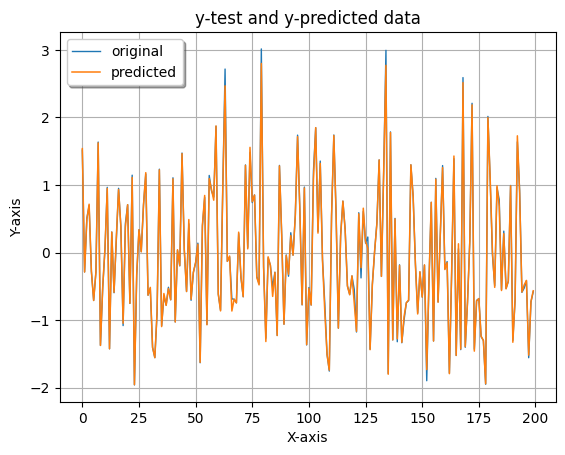

MSE:  0.00862989205078964
RMSE:  0.00431494602539482
0.025318686787773475
0.9913158676405353


In [77]:
rfr_2 = RandomForestRegressor(n_jobs=-1)
start=tm.time()
rfr_2.fit(X_train_2, y_train_2)
tr_time=tm.time()-start
start=tm.time()

ypred = rfr_2.predict(X_test_2)
ts_time=tm.time()-start
x_ax = range(len(y_test[0:200]))
plt.plot(x_ax, y_test_2[0:200], linewidth=1, label="original")
plt.plot(x_ax, ypred[0:200], linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
plt.scatter(y_test_2, ypred)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')
r2 = sklearn.metrics.r2_score(y_test_2, ypred)
plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(y_test_2, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test_2, ypred)
print(mean_absolute_error(y_test_2, ypred))

print(r2)

In [78]:
geneImport_2=pd.DataFrame({"metric":result_df.columns,"importance":rfr_2.feature_importances_})

In [79]:
geneImport_2=geneImport_2.sort_values("importance",ascending=False)

In [81]:
geneImport_2.to_csv("../result/11.5_multi_traj/11.6_gene_expression_rf_gam.csv")

In [82]:
geneImport_2

metric  importance
15              dpt    0.363967
8       pearsonCoor    0.174866
0          max_rows    0.114925
12       kendalltau    0.053494
4        sum_values    0.046854
9          pearsonP    0.040776
7       mutual_info    0.033266
1          min_rows    0.027753
14         spearman    0.022099
6   variance_values    0.021950
10     spearmanCoor    0.021657
13      kendalltauP    0.020824
11        spearmanP    0.016422
5      range_values    0.015557
2        max_values    0.012896
3        min_values    0.012694

In [202]:
joblib.dump(rfr_3, "../processed_data/trajMap_basis/11.15_raw_random_forest.joblib")

['../processed_data/trajMap_basis/11.15_raw_random_forest.joblib']

In [99]:
geneImport_2["metric"]

15                dpt
8         pearsonCoor
0            max_rows
12         kendalltau
4          sum_values
9            pearsonP
7         mutual_info
1            min_rows
14           spearman
6     variance_values
10       spearmanCoor
13        kendalltauP
11          spearmanP
5        range_values
2          max_values
3          min_values
Name: metric, dtype: object

In [100]:
metricClass={
    "pearsonCoor":"Correlation",
    "max_rows":"Peak",
    "kendalltau":"Correlation",
    "sum_values":"Expression",
    "pearsonP":"Correlation",
    "mutual_info":"Correlation",
    "min_rows":"Peak",
    "spearman":"Correlation",
    "variance_values":"Correlation",
    "spearmanCoor":"Correlation",
    "kendalltauP":"Correlation",
    "spearmanP":"Correlation",
    "range_values":"Expression",
    "max_values":"Expression",
    "min_values":"Expression"
}

In [106]:
geneImport_2=geneImport_2[1:]

In [103]:
geneImport_2['metric_class'] = geneImport_2["metric"].map(metricClass)

In [125]:
geneImport_2=geneImport_2.drop(14)

In [126]:
plt.figure(figsize=(8, 6))
# Define the color palette
color_palette = sns.color_palette("Set1", n_colors=len(geneImport_2['metric_class'].unique()))

# Create a bar plot with the color palette
sns.set_palette(color_palette)
sns.barplot(y ='metric', x='importance', hue='metric_class',dodge=False, data=geneImport_2)
plt.xticks(rotation=45)

plt.savefig("../result/11.5_multi_traj/11.7_metrics_inportance_gam.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>

In [137]:
plt.figure(figsize=(8, 6))
# Define the color palette
color_palette = sns.color_palette("Set1", n_colors=len(geneImport_2['metric_class'].unique()))

# Create a bar plot with the color palette
sns.set_palette(color_palette)
sns.barplot(y ='metric', x='importance', hue='metric_class',dodge=False, data=geneImport_2)
plt.xticks(rotation=45)

plt.savefig("../result/11.5_multi_traj/11.7_metrics_inportance_gam.pdf")
plt.show()

In [127]:
geneImport['metric_class'] = geneImport["metric"].map(metricClass)
geneImport.drop

In [131]:
geneImport=geneImport.drop(15)
geneImport=geneImport.drop(14)

In [23]:
rfr.feature_importances_

array([0.00742359, 0.00578451, 0.03622726, 0.04254702, 0.54631756,
       0.01206014, 0.01321261, 0.01609066, 0.00975008, 0.01074901,
       0.00649789, 0.00734683, 0.0069805 , 0.00742559, 0.00649044,
       0.26509628])

In [24]:
result_df.columns

Index(['max_rows', 'min_rows', 'max_values', 'min_values', 'sum_values',
       'range_values', 'variance_values', 'mutual_info', 'pearsonCoor',
       'pearsonP', 'spearmanCoor', 'spearmanP', 'kendalltau', 'kendalltauP',
       'spearman', 'dpt_time'],
      dtype='object')

In [35]:
np.sqrt(geneImport["importance"])

4     0.739133
15    0.514875
3     0.206269
2     0.190335
7     0.126849
6     0.114946
5     0.109819
9     0.103677
8     0.098742
13    0.086172
0     0.086160
11    0.085714
12    0.083549
10    0.080610
14    0.080563
1     0.076056
Name: importance, dtype: float64

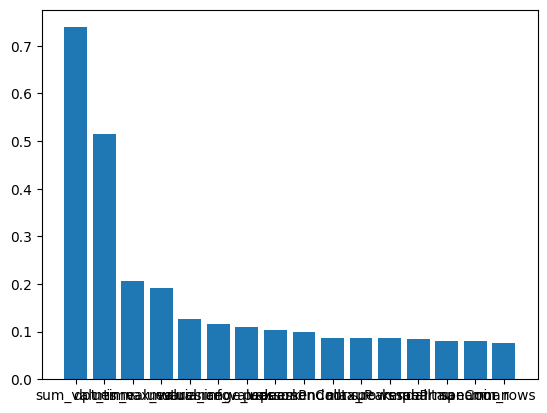

In [37]:
plt.bar(geneImport["metric"], np.sqrt(geneImport["importance"]))
plt.show()

# use three metrics to predict

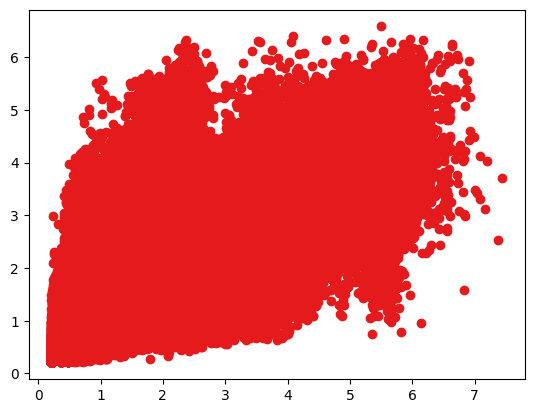

In [194]:
rfr3 = RandomForestRegressor(n_jobs=20)
start=tm.time()
rfr3.fit(X_train, y_train)
tr_time=tm.time()-start
start=tm.time()
ypred = rfr3.predict(X_test)
ts_time=tm.time()-start
x_ax = range(len(y_test[0:200]))
plt.plot(x_ax, y_test[0:200], linewidth=1, label="original")
plt.plot(x_ax, ypred[0:200], linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [200]:
# Add labels and title
r2 = sklearn.metrics.r2_score(y_test, ypred)
plt.scatter(y_test[0:10000], ypred[0:10000],s=5, marker='o',color='lightblue',rasterized=True)
plt.plot(y_test, y_test*r2, color='black', linestyle='--', label='Regression Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')

plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate('MSE = {:.2f}'.format(mse), xy=(0.05, 0.85), xycoords='axes fraction')
plt.savefig("../result/11.5_multi_traj/11.6_predict_raw_scatterplot.pdf")
# Display the plot
plt.show()
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test, ypred)
print(mean_absolute_error(y_test, ypred))

MSE:  0.1419499934998715
RMSE:  0.07097499674993575
0.24795807875048465


In [87]:
selectCol=["max_rows","dpt","pearsonCoor","sum_values"]
X_train_3=X_train_2[selectCol]
X_test_3=X_test_2[selectCol]
y_test_3=y_test_2
y_train_3=y_train_2

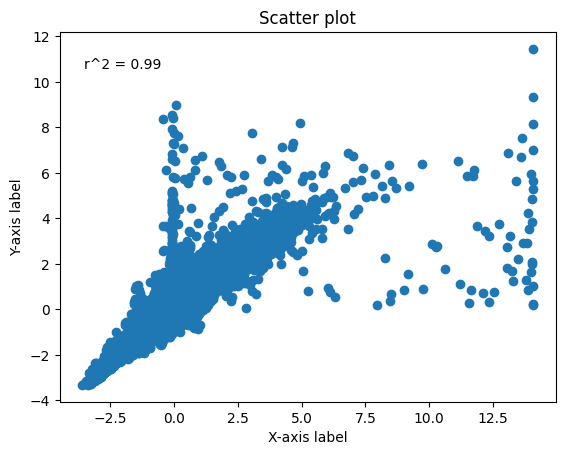

MSE:  0.01470415648391808
RMSE:  0.00735207824195904
0.04702587245081627
0.9852034254438974


In [88]:
rfr_3 = RandomForestRegressor(n_jobs=-1)
start=tm.time()
rfr_3.fit(X_train_3, y_train_3)
tr_time=tm.time()-start
start=tm.time()
ypred = rfr_3.predict(X_test_3)
ts_time=tm.time()-start
x_ax = range(len(y_test_3[0:200]))
plt.plot(x_ax, y_test_3[0:200], linewidth=1, label="original")
plt.plot(x_ax, ypred[0:200], linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
plt.scatter(y_test_3, ypred)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')
r2 = sklearn.metrics.r2_score(y_test_3, ypred)
plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(y_test_3, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test_3, ypred)
print(mean_absolute_error(y_test_3, ypred))

print(r2)

MSE:  0.01470415648391808
0.04702587245081627


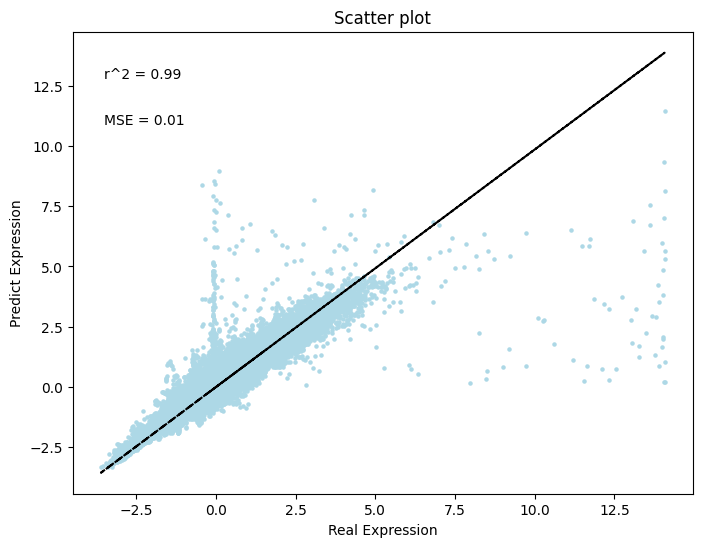

0.9852034254438974


In [136]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test_3, ypred,s=5, marker='o',color='lightblue',rasterized=True)
plt.plot(y_test_3, y_test_3*r2, color='black', linestyle='--', label='Regression Line')
# Add labels and title
plt.ylabel('Predict Expression')
plt.xlabel('Real Expression')
plt.title('Scatter plot')

plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')
plt.annotate('MSE = {:.2f}'.format(mse), xy=(0.05, 0.80), xycoords='axes fraction')
# Display the plot

mse = mean_squared_error(y_test_3, ypred)
print("MSE: ", mse)
mae=mean_absolute_error(y_test_3, ypred)
print(mean_absolute_error(y_test_3, ypred))
plt.savefig("../result/11.5_multi_traj/11.6_predict_scatterplot.pdf")
plt.show()
print(r2)

In [17]:
small_train=X_train.iloc[0:592485]
small_y=y_train[0:592485]

In [20]:
small_test_x=X_test.iloc[0:10000]
small_test_y=y_test[0:10000]

In [18]:
rfr = RandomForestRegressor(n_jobs=20)
start=tm.time()
rfr.fit(small_train, small_y)
tr_time=tm.time()-start
start=tm.time()
ypred = rfr.predict(X_test)
ts_time=tm.time()-start
score = rfr.score(small_train, small_y)
print("R-squared:", score) 
x_ax = range(len(y_test[0:200]))
plt.plot(x_ax, y_test[0:200], linewidth=1, label="original")
plt.plot(x_ax, ypred[0:200], linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
plt.scatter(y_test, ypred)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')
r2 = sklearn.metrics.r2_score(y_test, ypred)
plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(y_test, ypred)
print(mean_absolute_error(y_test, ypred))

print(r2)

R-squared: 0.9327298657796684


MSE:  0.13465127927076376
RMSE:  0.06732563963538188
0.1825558122429081
0.5177744116908718


In [22]:

ts_time=tm.time()-start
small_ypred = rfr.predict(small_test_x)
x_ax = range(len(y_test[0:200]))
plt.plot(x_ax, y_test[0:200], linewidth=1, label="original")
plt.plot(x_ax, ypred[0:200], linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
plt.scatter(small_test_y, small_ypred)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')
r2 = sklearn.metrics.r2_score(small_test_y, small_ypred)
plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(small_test_y, small_ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(small_test_y, small_ypred)
print(mean_absolute_error(small_test_y, small_ypred))

MSE:  0.1359788102890217
RMSE:  0.06798940514451085
0.18624833057649434


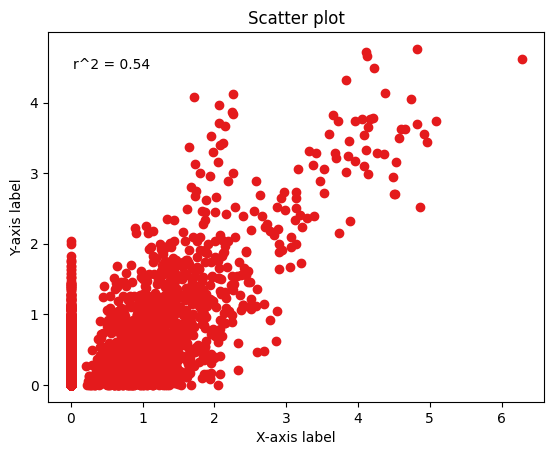

MSE:  0.1359788102890217
RMSE:  0.06798940514451085
0.18624833057649434


In [139]:
plt.scatter(small_test_y, small_ypred)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot')
r2 = sklearn.metrics.r2_score(small_test_y, small_ypred)
plt.annotate('r^2 = {:.2f}'.format(r2), xy=(0.05, 0.90), xycoords='axes fraction')

# Display the plot
plt.show()
mse = mean_squared_error(small_test_y, small_ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 
mae=mean_absolute_error(small_test_y, small_ypred)
print(mean_absolute_error(small_test_y, small_ypred))

In [128]:
adata=sc.read_h5ad("../../temp_data/10.27_dpt_sub.h5ad")

dpt=pd.read_csv("../../temp_data/palantir_norm.csv",index_col=0)